In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análise e exploração dos dados
Aqui utilizaremos os três arquivos gerados em ***1 - Coleta, processamento e tratamento de dados.ipynb***. Seus dados ficarão armazenados nos seguintes DataFrames:
- df_pl: dados de pedidos em formato longo, com uma linha para cada produto presente nos pedidos;
- df_pw: dados de pedidos em formato wide, com uma linha para cada pedido;
- df_c: dados de clientes, com uma linha para cada cliente.
<p><br>
O significado de cada campo é bastante intuitivo, podendo ser reforçado por meio de análise do notebook mencionado acima. <b><font color='red'>MELHORAR ESSA DESCRIÇÃO DE CAMPOS </font></b>

In [2]:
df_pl = pd.read_csv('arquivos/pedidos_long_final.csv')
df_pl.head()

,id_pedido,data_pedido,id_cliente,bairro_pedido,cidade_pedido,cep_pedido,nome_produto,qnt_itens_vendidos,preco_itens,tipo_pagamento,agente,hora_pedido,categoria
0,54,2020-07-03,39,aldeota,fortaleza,60150060,cajuina,3,10.0,Pagar ao retirar na loja,android,11:30:53,sucos refrescos e refrigerantes
1,54,2020-07-03,39,aldeota,fortaleza,60150060,agua de coco,2,3.0,Pagar ao retirar na loja,android,11:30:53,agua energeticos e chas
2,54,2020-07-03,39,aldeota,fortaleza,60150060,couve,1,3.0,Pagar ao retirar na loja,android,11:30:53,verduras
3,54,2020-07-03,39,aldeota,fortaleza,60150060,couve,1,3.0,Pagar ao retirar na loja,android,11:30:53,verduras
4,54,2020-07-03,39,aldeota,fortaleza,60150060,doce de leite,1,12.0,Pagar ao retirar na loja,android,11:30:53,doces e sobremesas


In [3]:
df_pw =pd.read_csv('arquivos/pedidos_wide_final.csv')
df_pw.head()

,id_pedido,data_pedido,hora_pedido,id_cliente,bairro_pedido,cidade_pedido,cep_pedido,tipo_pagamento,agente,i_cajuina,...,vl_tot_pimentao [ 500g ],i_abobrinha,qt_abobrinha,vl_tot_abobrinha,i_quiabo [ kg ],qt_quiabo [ kg ],vl_tot_quiabo [ kg ],i_pepino amarelo [ unidade ],qt_pepino amarelo [ unidade ],vl_tot_pepino amarelo [ unidade ]
0,54,2020-07-03,11:30:53,39,aldeota,fortaleza,60150060,Pagar ao retirar na loja,android,True,...,0.0,False,0.0,0.0,False,0.0,0.0,False,0.0,0.0
1,56,2020-07-03,11:32:27,38,sao gerardo,fortaleza,60320105,Cartão de Crédito,windows,False,...,0.0,False,0.0,0.0,False,0.0,0.0,False,0.0,0.0
2,59,2020-07-03,11:38:01,35,manoel satiro,fortaleza,60713480,Cartão de Crédito,windows,False,...,0.0,False,0.0,0.0,False,0.0,0.0,False,0.0,0.0
3,60,2020-07-03,11:38:27,33,rodolfo teofilo,fortaleza,60431075,Débito/Transferência,android,False,...,0.0,False,0.0,0.0,False,0.0,0.0,False,0.0,0.0
4,64,2020-07-03,11:49:13,40,rodolfo teofilo,fortaleza,60430660,Cartão de Crédito,android,False,...,0.0,False,0.0,0.0,False,0.0,0.0,False,0.0,0.0


## Análise de dados de categoria

Primeiramente vamos ver qual categoria mais aparece nos pedidos, independente da quantidade de itens, levando-se em consideração somente sua presença neles. O eixo x representa a quantidade de vezes que produtos de cada categoria foram acrescentados aos pedidos.

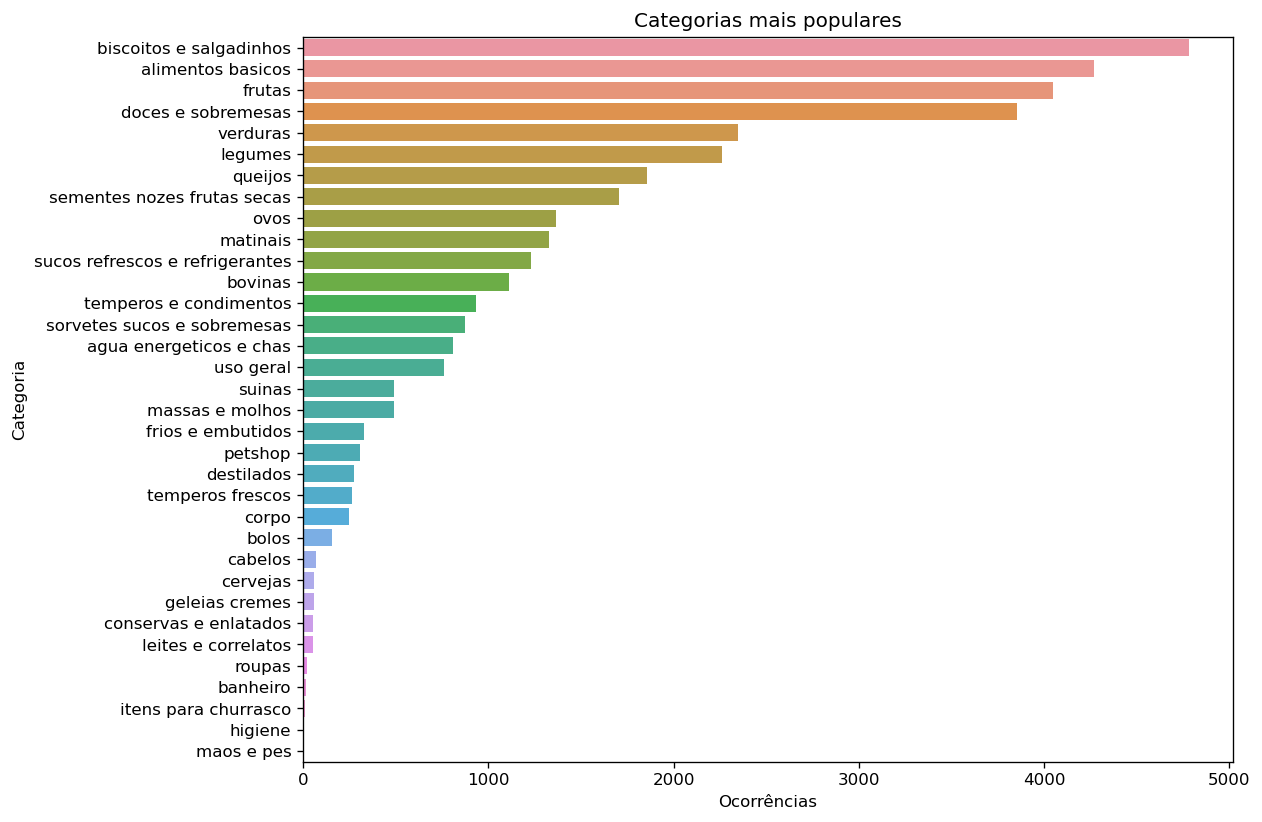

In [4]:
plt.figure(dpi=120,figsize=(10,8))
ax = sns.countplot(data=df_pl,y='categoria',order=df_pl['categoria'].value_counts().index)
ax.set(xlabel='Ocorrências',ylabel='Categoria',title='Categorias mais populares');

<font color='red'><b>VAMOS DEIXAR ESSA ANÁLISE PRA DEPOIS, QUANDO EU CONSEGUIR BAIXAR OS PRODUTOS DO MERCADOS E RETREINAR O MODELO DE CATEGORIZAÇÃO DE PRODUTOS. NÃO ESQUECER DE GERAR O ARQUIVO DO DATAFRAME LONGO DE PEDIDOS NO NOTEBOOOK 1<i></font></b></i>

## Análise de dados de pedidos

Qual são os 20 produtos que mais apareceram aparecem nos pedidos, independente da quantidade que foi incluída em cada um deles? Em outras palavras, em quantos pedidos apareceu cada um desses produtos?

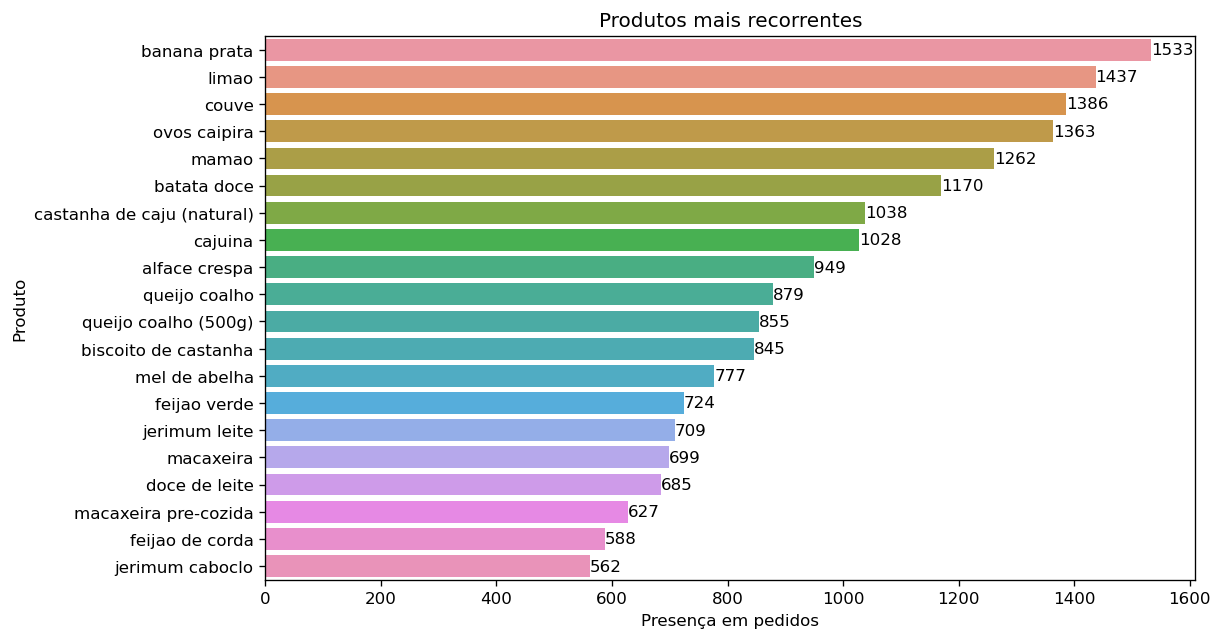

In [5]:
cols_int = [coluna for coluna in df_pw.columns if coluna[0:2] == 'i_']
prods_int = df_pw[cols_int].sum().nlargest(20)

plt.figure(dpi=120,figsize=(10,6))
ax = sns.barplot(y=prods_int.index,x=prods_int.values)
ax.set(title='Produtos mais recorrentes',xlabel='Presença em pedidos',ylabel='Produto');
labels_prods = [nome[2:] for nome in prods_int.index]
ax.set_yticklabels(labels_prods)
ax.bar_label(ax.containers[0]);

E quais são os produtos que mais faturam?

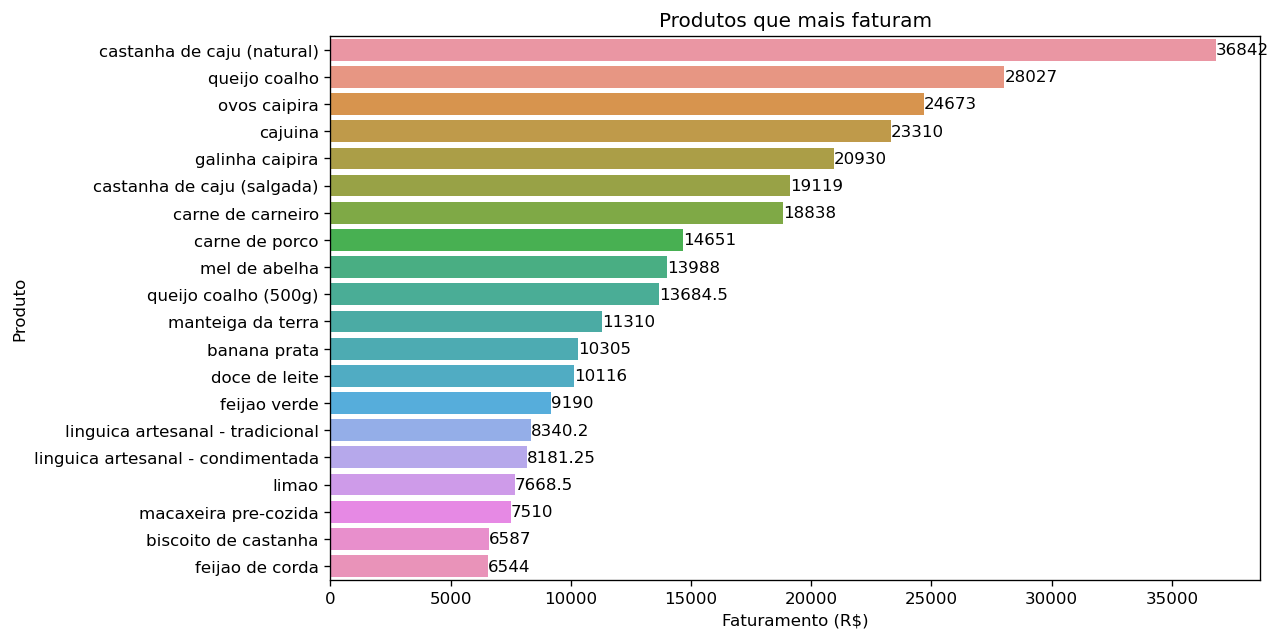

In [6]:
cols_int = [coluna for coluna in df_pw.columns if coluna[0:4] == 'vl_t']
prods_int = df_pw[cols_int].sum().nlargest(20)

plt.figure(dpi=120,figsize=(10,6))
ax = sns.barplot(y=prods_int.index,x=prods_int.values)
ax.set(title='Produtos que mais faturam',xlabel='Faturamento (R$)',ylabel='Produto')
labels_prods_fa = [nome[7:] for nome in prods_int.index]
ax.set_yticklabels(labels_prods_fa)
ax.bar_label(ax.containers[0]);

E quais produtos são unitariamente mais vendidos?

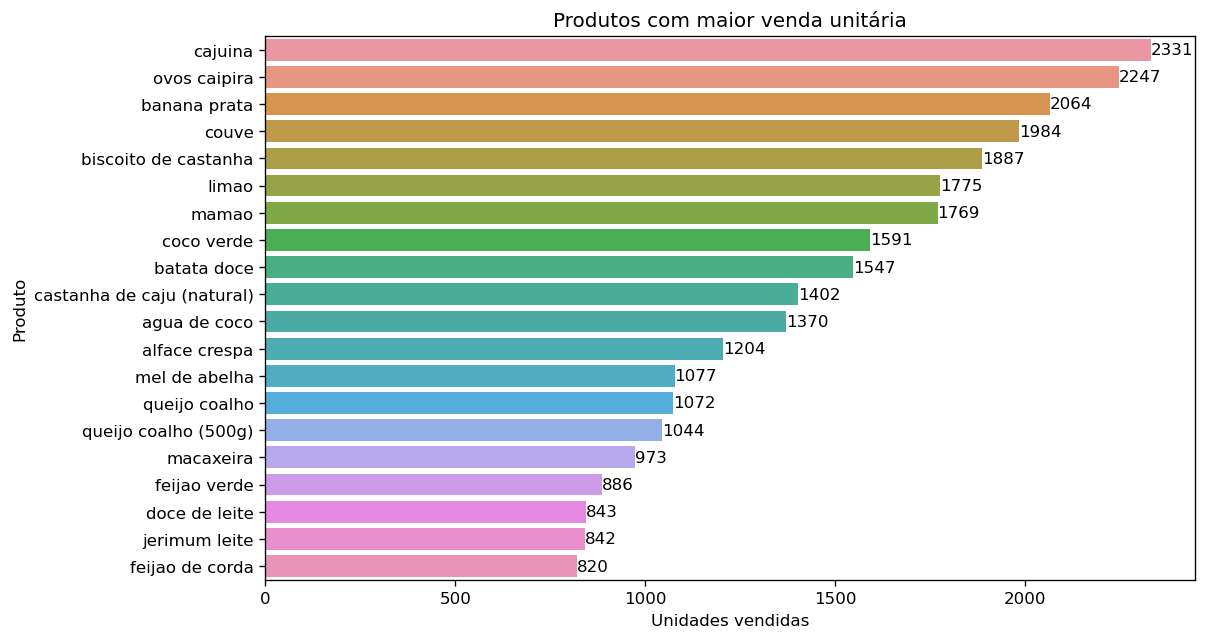

In [7]:
cols_int = [coluna for coluna in df_pw.columns if coluna[0:3] == 'qt_']
cols_int.remove('qt_final_itens')
prods_int = df_pw[cols_int].sum().nlargest(20)

plt.figure(dpi=120,figsize=(10,6))
ax = sns.barplot(y=prods_int.index,x=prods_int.values)
ax.set(title='Produtos com maior venda unitária',xlabel='Unidades vendidas',ylabel='Produto')
labels_prods_vu = [nome[3:] for nome in prods_int.index]
ax.set_yticklabels(labels_prods_vu)
ax.bar_label(ax.containers[0]);